<a href="https://colab.research.google.com/github/Hiranmai-T/EVA/blob/master/S8/S8_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms


In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [4]:
from dataloader import dataloader
#dataloader.py has dataloader method which defines the transformtions and also load the dataset needed
trainset,trainloader,testset,testloader = dataloader(dataset="cifar10",mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5), bs=128,
                                           nw=4,use_cuda=True)
#mean and std for transformations. bs = batch_size, nw = no_of_workers 

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



 ship   dog truck truck


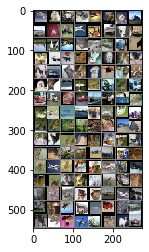

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [6]:
from resnet import ResNet18
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import torchvision
import torchvision.transforms as transforms

train_losses=[]
train_acc=[]
test_losses=[]
test_acc=[]

In [0]:
from train_test import train,test
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [10]:
EPOCHS = 50
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    # scheduler.step()
    test(model, device, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.9136377573013306 Batch_id=390 Accuracy=24.34: 100%|██████████| 391/391 [00:52<00:00,  7.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6666, Accuracy: 3334/10000 (33.34%)

EPOCH: 1


Loss=1.5040795803070068 Batch_id=390 Accuracy=39.97: 100%|██████████| 391/391 [00:52<00:00,  7.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5576, Accuracy: 4424/10000 (44.24%)

EPOCH: 2


Loss=1.5453779697418213 Batch_id=390 Accuracy=49.31: 100%|██████████| 391/391 [00:52<00:00,  7.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4753, Accuracy: 5247/10000 (52.47%)

EPOCH: 3


Loss=1.062936544418335 Batch_id=390 Accuracy=55.72: 100%|██████████| 391/391 [00:53<00:00,  7.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4172, Accuracy: 5828/10000 (58.28%)

EPOCH: 4


Loss=0.89935302734375 Batch_id=390 Accuracy=60.80: 100%|██████████| 391/391 [00:54<00:00,  7.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4078, Accuracy: 5922/10000 (59.22%)

EPOCH: 5


Loss=1.003537893295288 Batch_id=390 Accuracy=64.91: 100%|██████████| 391/391 [00:53<00:00,  7.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3682, Accuracy: 6318/10000 (63.18%)

EPOCH: 6


Loss=0.9483639001846313 Batch_id=390 Accuracy=68.09: 100%|██████████| 391/391 [00:54<00:00,  7.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3624, Accuracy: 6376/10000 (63.76%)

EPOCH: 7


Loss=0.7643187642097473 Batch_id=390 Accuracy=70.74: 100%|██████████| 391/391 [00:53<00:00,  7.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2942, Accuracy: 7058/10000 (70.58%)

EPOCH: 8


Loss=0.5004009008407593 Batch_id=390 Accuracy=73.02: 100%|██████████| 391/391 [00:54<00:00,  7.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.3069, Accuracy: 6931/10000 (69.31%)

EPOCH: 9


Loss=0.7066304683685303 Batch_id=390 Accuracy=74.90: 100%|██████████| 391/391 [00:54<00:00,  7.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2745, Accuracy: 7255/10000 (72.55%)

EPOCH: 10


Loss=0.6561418771743774 Batch_id=390 Accuracy=76.46: 100%|██████████| 391/391 [00:54<00:00,  7.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2801, Accuracy: 7199/10000 (71.99%)

EPOCH: 11


Loss=0.7923592329025269 Batch_id=390 Accuracy=77.70: 100%|██████████| 391/391 [00:53<00:00,  7.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2415, Accuracy: 7585/10000 (75.85%)

EPOCH: 12


Loss=0.6149882674217224 Batch_id=390 Accuracy=79.03: 100%|██████████| 391/391 [00:54<00:00,  7.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2378, Accuracy: 7622/10000 (76.22%)

EPOCH: 13


Loss=0.5376025438308716 Batch_id=390 Accuracy=80.31: 100%|██████████| 391/391 [00:54<00:00,  7.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2452, Accuracy: 7548/10000 (75.48%)

EPOCH: 14


Loss=0.5275524258613586 Batch_id=390 Accuracy=81.45: 100%|██████████| 391/391 [00:54<00:00,  7.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2319, Accuracy: 7681/10000 (76.81%)

EPOCH: 15


Loss=0.606770396232605 Batch_id=390 Accuracy=82.48: 100%|██████████| 391/391 [00:54<00:00,  7.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2076, Accuracy: 7924/10000 (79.24%)

EPOCH: 16


Loss=0.4770270884037018 Batch_id=390 Accuracy=83.21: 100%|██████████| 391/391 [00:54<00:00,  7.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2211, Accuracy: 7789/10000 (77.89%)

EPOCH: 17


Loss=0.4466692805290222 Batch_id=390 Accuracy=84.59: 100%|██████████| 391/391 [00:54<00:00,  7.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1964, Accuracy: 8036/10000 (80.36%)

EPOCH: 18


Loss=0.4871983528137207 Batch_id=390 Accuracy=85.26: 100%|██████████| 391/391 [00:53<00:00,  7.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1927, Accuracy: 8073/10000 (80.73%)

EPOCH: 19


Loss=0.43661561608314514 Batch_id=390 Accuracy=86.38: 100%|██████████| 391/391 [00:53<00:00,  7.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.2016, Accuracy: 7984/10000 (79.84%)

EPOCH: 20


Loss=0.4333580434322357 Batch_id=390 Accuracy=87.22: 100%|██████████| 391/391 [00:54<00:00,  7.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1898, Accuracy: 8102/10000 (81.02%)

EPOCH: 21


Loss=0.26636645197868347 Batch_id=390 Accuracy=87.81: 100%|██████████| 391/391 [00:54<00:00,  7.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1776, Accuracy: 8224/10000 (82.24%)

EPOCH: 22


Loss=0.23585648834705353 Batch_id=390 Accuracy=88.39: 100%|██████████| 391/391 [00:53<00:00,  7.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1916, Accuracy: 8084/10000 (80.84%)

EPOCH: 23


Loss=0.2993505895137787 Batch_id=390 Accuracy=89.24: 100%|██████████| 391/391 [00:54<00:00,  7.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1683, Accuracy: 8317/10000 (83.17%)

EPOCH: 24


Loss=0.1411430537700653 Batch_id=390 Accuracy=89.68: 100%|██████████| 391/391 [00:54<00:00,  7.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1717, Accuracy: 8283/10000 (82.83%)

EPOCH: 25


Loss=0.22093674540519714 Batch_id=390 Accuracy=90.08: 100%|██████████| 391/391 [00:54<00:00,  7.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1698, Accuracy: 8302/10000 (83.02%)

EPOCH: 26


Loss=0.20611600577831268 Batch_id=390 Accuracy=90.99: 100%|██████████| 391/391 [00:54<00:00,  7.22it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1612, Accuracy: 8388/10000 (83.88%)

EPOCH: 27


Loss=0.3215797543525696 Batch_id=390 Accuracy=91.28: 100%|██████████| 391/391 [00:54<00:00,  7.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1605, Accuracy: 8395/10000 (83.95%)

EPOCH: 28


Loss=0.18270546197891235 Batch_id=390 Accuracy=91.87: 100%|██████████| 391/391 [00:54<00:00,  7.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1631, Accuracy: 8369/10000 (83.69%)

EPOCH: 29


Loss=0.22282211482524872 Batch_id=390 Accuracy=92.49: 100%|██████████| 391/391 [00:53<00:00,  7.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1497, Accuracy: 8503/10000 (85.03%)

EPOCH: 30


Loss=0.18440797924995422 Batch_id=390 Accuracy=92.62: 100%|██████████| 391/391 [00:53<00:00,  7.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1673, Accuracy: 8327/10000 (83.27%)

EPOCH: 31


Loss=0.19085010886192322 Batch_id=390 Accuracy=93.23: 100%|██████████| 391/391 [00:54<00:00,  7.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1531, Accuracy: 8469/10000 (84.69%)

EPOCH: 32


Loss=0.21944284439086914 Batch_id=390 Accuracy=93.44: 100%|██████████| 391/391 [00:54<00:00,  7.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1578, Accuracy: 8422/10000 (84.22%)

EPOCH: 33


Loss=0.1479659080505371 Batch_id=390 Accuracy=94.06: 100%|██████████| 391/391 [00:54<00:00,  7.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1472, Accuracy: 8528/10000 (85.28%)

EPOCH: 34


Loss=0.11916439235210419 Batch_id=390 Accuracy=94.25: 100%|██████████| 391/391 [00:54<00:00,  7.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1496, Accuracy: 8504/10000 (85.04%)

EPOCH: 35


Loss=0.12738507986068726 Batch_id=390 Accuracy=94.66: 100%|██████████| 391/391 [00:54<00:00,  7.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1456, Accuracy: 8544/10000 (85.44%)

EPOCH: 36


Loss=0.21988558769226074 Batch_id=390 Accuracy=94.78: 100%|██████████| 391/391 [00:54<00:00,  7.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1531, Accuracy: 8469/10000 (84.69%)

EPOCH: 37


Loss=0.06286820024251938 Batch_id=390 Accuracy=95.00: 100%|██████████| 391/391 [00:54<00:00,  7.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1434, Accuracy: 8566/10000 (85.66%)

EPOCH: 38


Loss=0.06389093399047852 Batch_id=390 Accuracy=95.58: 100%|██████████| 391/391 [00:54<00:00,  7.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1487, Accuracy: 8513/10000 (85.13%)

EPOCH: 39


Loss=0.14834702014923096 Batch_id=390 Accuracy=95.82: 100%|██████████| 391/391 [00:54<00:00,  7.18it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1432, Accuracy: 8568/10000 (85.68%)

EPOCH: 40


Loss=0.05784023553133011 Batch_id=390 Accuracy=96.05: 100%|██████████| 391/391 [00:54<00:00,  7.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1522, Accuracy: 8478/10000 (84.78%)

EPOCH: 41


Loss=0.08490999042987823 Batch_id=390 Accuracy=96.19: 100%|██████████| 391/391 [00:54<00:00,  7.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1438, Accuracy: 8562/10000 (85.62%)

EPOCH: 42


Loss=0.05436823517084122 Batch_id=390 Accuracy=96.45: 100%|██████████| 391/391 [00:54<00:00,  7.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1503, Accuracy: 8497/10000 (84.97%)

EPOCH: 43


Loss=0.09875966608524323 Batch_id=390 Accuracy=96.55: 100%|██████████| 391/391 [00:54<00:00,  7.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1426, Accuracy: 8574/10000 (85.74%)

EPOCH: 44


Loss=0.12619516253471375 Batch_id=390 Accuracy=96.74: 100%|██████████| 391/391 [00:54<00:00,  7.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1429, Accuracy: 8571/10000 (85.71%)

EPOCH: 45


Loss=0.09006671607494354 Batch_id=390 Accuracy=96.89: 100%|██████████| 391/391 [00:54<00:00,  7.17it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1393, Accuracy: 8607/10000 (86.07%)

EPOCH: 46


Loss=0.14776764810085297 Batch_id=390 Accuracy=96.97: 100%|██████████| 391/391 [00:54<00:00,  7.20it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1445, Accuracy: 8555/10000 (85.55%)

EPOCH: 47


Loss=0.07493582367897034 Batch_id=390 Accuracy=97.22: 100%|██████████| 391/391 [00:54<00:00,  7.16it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1363, Accuracy: 8637/10000 (86.37%)

EPOCH: 48


Loss=0.06408748775720596 Batch_id=390 Accuracy=97.28: 100%|██████████| 391/391 [00:54<00:00,  7.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.1429, Accuracy: 8571/10000 (85.71%)

EPOCH: 49


Loss=0.052967630326747894 Batch_id=390 Accuracy=97.52: 100%|██████████| 391/391 [00:54<00:00,  7.20it/s]



Test set: Average loss: 0.1380, Accuracy: 8620/10000 (86.20%)



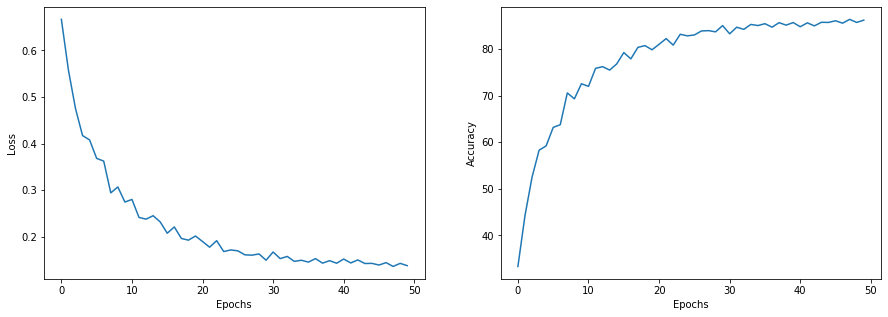

In [11]:
from train_test import draw_graph
draw_graph()

GroundTruth:    cat  ship  ship plane


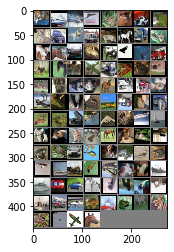

In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images.to(device)))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j].to(device)] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = model(images.to(device))

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels.to(device)).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 95 %
Accuracy of   car : 100 %
Accuracy of  bird : 78 %
Accuracy of   cat : 53 %
Accuracy of  deer : 75 %
Accuracy of   dog : 78 %
Accuracy of  frog : 83 %
Accuracy of horse : 96 %
Accuracy of  ship : 91 %
Accuracy of truck : 86 %
